# 의사결정트리 회귀 기본 코드

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.regression import *

from sklearn.tree import DecisionTreeRegressor

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel('https://data.hossam.kr/mldata/fish.xlsx',info=False)

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리 + 스케일링

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='무게', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((44, 3), (12, 3), (44,), (12,))

### [2] 의사결정나무 회귀 모델 구현

| 하이퍼파라미터       | 설명 | 기본값 | 추천 사항 | `GridSearchCV` 추천값 |
|---------------------|------|--------|-----------|------------------------|
| * `criterion`         | 노드를 분할할 기준 | 'squared_error' | 문제에 따라 다르지만, 일반적으로 하나를 선택해서 실험해보는 걸 권장 | `{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}` |

In [4]:
estimator = DecisionTreeRegressor(criterion='squared_error')
estimator.fit(x_train, y_train)

DecisionTreeRegressor()

### [3] 성능평가

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |            1 |     0.921953 |
| 평균절대오차(MAE)             |            0 |      65.3333 |
| 평균제곱오차(MSE)             |            0 |      9208.83 |
| 평균오차(RMSE)                |            0 |      95.9627 |
| 평균 절대 백분오차 비율(MAPE) |            0 |      12.9313 |
| 평균 비율 오차(MPE)           |            0 |     -3.67349 |
+-------------------------------+--------------+--------------+

[학습곡선]


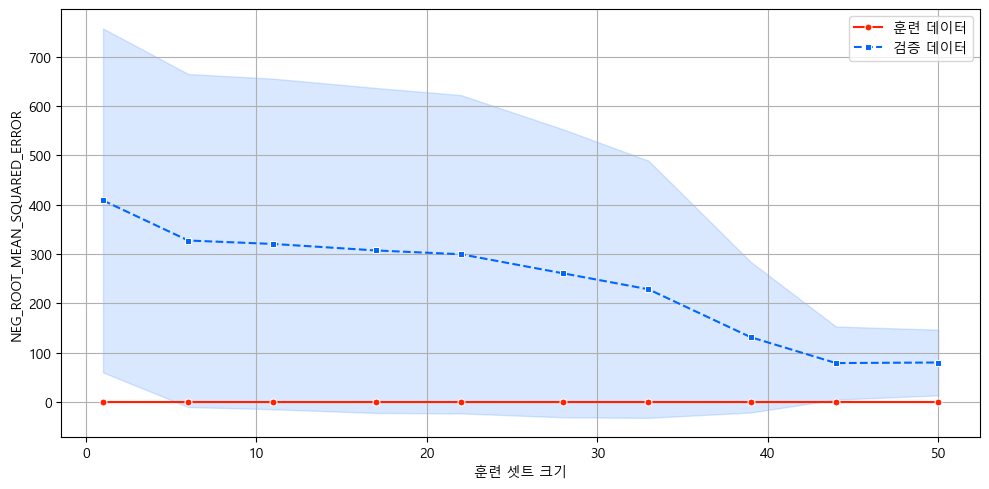

In [5]:
my_regression_result(estimator, x_train,y_train, x_test, y_test)

## #04. 2차항 생성 후 분석 수행

### [1] 2차항 생성

In [7]:
df = my_poly_features(origin, ignore=['무게'])
my_pretty_table(df.head())

+----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+--------+
|    |   길이 |   높이 |   두께 |   길이^2 |   길이 높이 |   길이 두께 |   높이^2 |   높이 두께 |   두께^2 |   무게 |
|----+--------+--------+--------+----------+-------------+-------------+----------+-------------+----------+--------|
|  0 |    8.4 |   2.11 |   1.41 |    70.56 |      17.724 |      11.844 |   4.4521 |      2.9751 |   1.9881 |    5.9 |
|  1 |   13.7 |   3.53 |      2 |   187.69 |      48.361 |        27.4 |  12.4609 |        7.06 |        4 |     32 |
|  2 |     15 |   3.82 |   2.43 |      225 |        57.3 |       36.45 |  14.5924 |      9.2826 |   5.9049 |     40 |
|  3 |   16.2 |   4.59 |   2.63 |   262.44 |      74.358 |      42.606 |  21.0681 |     12.0717 |   6.9169 |   51.5 |
|  4 |   17.4 |   4.59 |   2.94 |   302.76 |      79.866 |      51.156 |  21.0681 |     13.4946 |   8.6436 |     70 |
+----+--------+--------+--------+----------+-------------+-------------+----------

### [2] 훈련, 검증 데이터 분리 + 스케일링

In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='무게', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((44, 9), (12, 9), (44,), (12,))

### [3] 예측 모델 구현

In [11]:
estimator = DecisionTreeRegressor(criterion='squared_error')
estimator.fit(x_train, y_train)

DecisionTreeRegressor()

### [4] 성능평가

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |            1 |     0.977791 |
| 평균절대오차(MAE)             |            0 |        34.25 |
| 평균제곱오차(MSE)             |            0 |      2620.42 |
| 평균오차(RMSE)                |            0 |        51.19 |
| 평균 절대 백분오차 비율(MAPE) |            0 |      7.49699 |
| 평균 비율 오차(MPE)           |            0 |      1.47974 |
+-------------------------------+--------------+--------------+

[학습곡선]


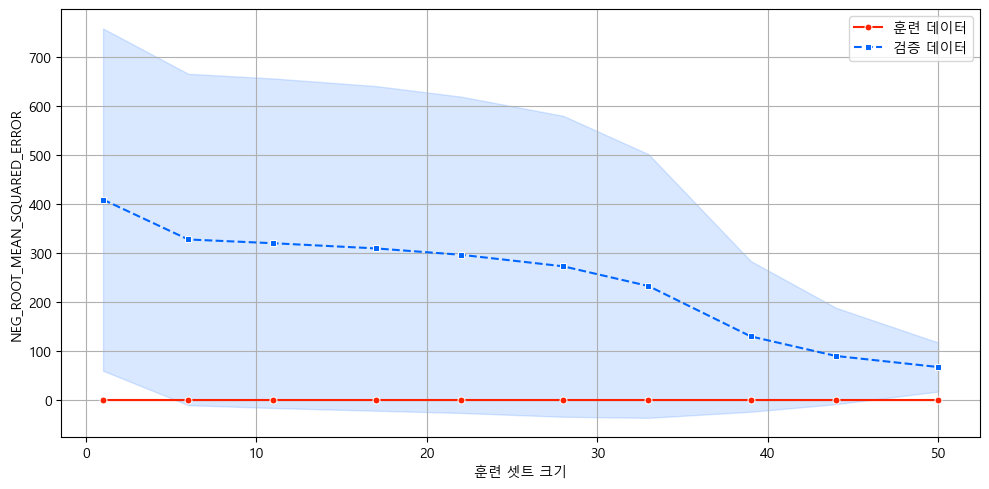

In [12]:
my_regression_result(estimator, x_train, y_train, x_test, y_test)

## #04. 모듈화 기능 확인

### [1] Dtree 회귀 

DecisionTreeRegressor의 random_state 설정됨
DecisionTreeRegressor {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
[교차검증 TOP5]
+----+----------------+-------------------+
|    | criterion      |   mean_test_score |
|----+----------------+-------------------|
|  2 | absolute_error |          0.977361 |
|  0 | squared_error  |          0.970358 |
|  1 | friedman_mse   |          0.970358 |
|  3 | poisson        |          0.950987 |
+----+----------------+-------------------+

[Best Params]
{'criterion': 'absolute_error'}

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |            1 |     0.989445 |
| 평균절대오차(MAE)             |            0 |        24.25 |
| 평균제곱오차(MSE)             |            0 |      1245.42 |
| 평균오차(RMSE)                |            0 |      35.2905 |
| 평균 절대 백분오차 비율(MA

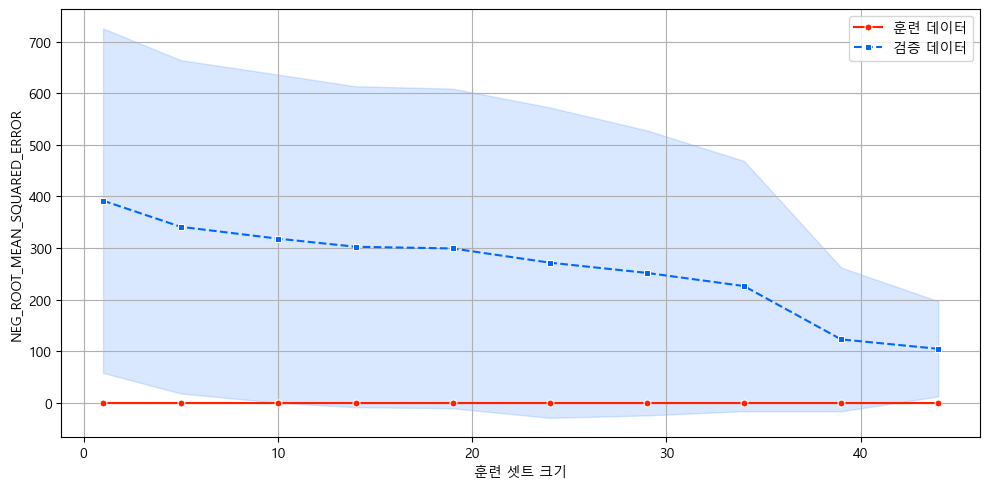


+----+------------+------------+-------------+
|    | 종속변수   | 독립변수   |         VIF |
|----+------------+------------+-------------|
|  0 | 무게       | 길이       |     4666.23 |
|  1 | 무게       | 높이       |     7788.42 |
|  2 | 무게       | 두께       |     7565.13 |
|  3 | 무게       | 길이^2     |      188326 |
|  4 | 무게       | 길이 높이  | 1.35281e+06 |
|  5 | 무게       | 길이 두께  |      186885 |
|  6 | 무게       | 높이^2     |      359211 |
|  7 | 무게       | 높이 두께  |      590745 |
|  8 | 무게       | 두께^2     |      176151 |
+----+------------+------------+-------------+



DecisionTreeRegressor(criterion='absolute_error', random_state=1234)

In [13]:
my_dtree_regression(x_train, y_train, x_test, y_test)

### [2] 지금까지의 모든 예측 모형 비교

In [14]:
my_regression(x_train, y_train, x_test, y_test)

LinearRegression의 n_jobs 설정됨
LinearRegression {}
Ridge의 random_state 설정됨
Ridge {}
Lasso의 random_state 설정됨
Lasso {}
KNeighborsRegressor의 n_jobs 설정됨
KNeighborsRegressor {}
DecisionTreeRegressor의 random_state 설정됨
DecisionTreeRegressor {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
+-----------------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|                       |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|-----------------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| Ridge                 |       0.987765 |              26.179 |             1443.59 |          37.9946 |                         6.90009 |              -3.32333 |
| LinearRegression      |        0.88922 |             59.9979 |      

{'Ridge': Ridge(random_state=1234),
 'LinearRegression': LinearRegression(n_jobs=-1),
 'Lasso': Lasso(random_state=1234),
 'DecisionTreeRegressor': DecisionTreeRegressor(criterion='absolute_error', random_state=1234),
 'KNeighborsRegressor': KNeighborsRegressor(n_jobs=-1)}